Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/landonreese/miniconda3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/tg/yk23k2ls3n18zsg7ck9s31dm0000gn/T/ipykernel_26300/1142874467.py", line 42, in run_boost_algorithm
    y_pred = model.predict(X_test)
UnboundLocalError: local variable 'model' referenced before assignment


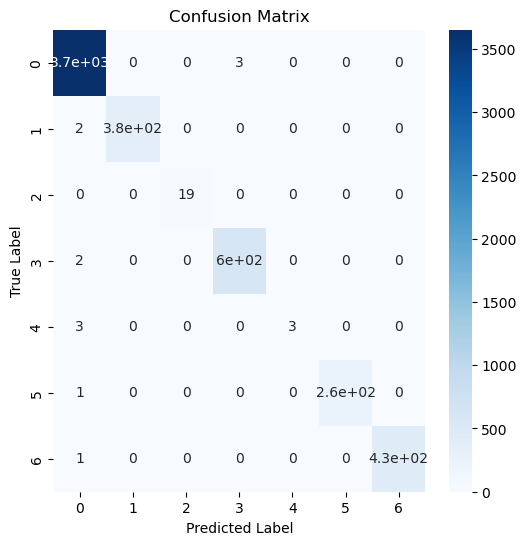

In [2]:
# Modified Graphical User Interface to show what kind of attack and 
import tkinter as tk
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt


def run_boost_algorithm():
    # Load the data set
    df = pd.read_csv("data/CICIDS2017_sample_km.csv")

    # Define the feature and target variables
    X = df.drop(["Label"], axis=1)
    y = df["Label"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Get the selected boost algorithm from the dropdown menu
    selected_boost = boost_menu.get()

    # Train the selected boost algorithm on the training data
    if selected_boost == "LightGBM":
        model = lgb.LGBMClassifier()
        model.fit(X_train, y_train)
    elif selected_boost == "XGBoost":
        model = xgb.XGBClassifier()
        model.fit(X_train, y_train)
    elif selected_boost == "CatBoost":
        model = cbt.CatBoostClassifier(verbose=0)
        model.fit(X_train, y_train)

    # Make predictions on the test data using the trained model
    y_pred = model.predict(X_test)

    # Generate a classification report and confusion matrix
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Create a new window to display the classification report and confusion matrix
    report_window = tk.Toplevel()
    report_window.title("Classification Report and Confusion Matrix")

    # Add a Text widget to the new window to display the classification report
    report_text = tk.Text(report_window, height=10, width=50)
    report_text.
    report_text.insert(tk.END, report)
    report_text.pack(pady=10)

    # Display the report and matrix in a pop-up window
    messagebox.showinfo("Classification Report", report)
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Add a button to close the window
    close_button = tk.Button(report_window, text="Close", command=report_window.destroy)
    close_button.pack(pady=10)


# Create the GUI window using Tkinter
root = tk.Tk()
root.geometry("400x200")
root.title("LCCDE Security System")

# Add a dropdown menu for selecting the boost algorithm
boost_menu = ttk.Combobox(root, values=["LightGBM", "XGBoost", "CatBoost"])
boost_menu.set("Select Boost Algorithm")
boost_menu.pack(pady=10)

# Add a run button for running the selected boost algorithm on the data set
run_button = tk.Button(root, text="Run Boost Algorithm", command=run_boost_algorithm)
run_button.pack(pady=10)

# Start the GUI event loop
root.mainloop()